In [25]:
import matplotlib.pyplot as  plt
import pandas as pd
import numpy as np
import string
import math

#Importamos el DF que exportamos previamente a csv en "Cleaning_DS_v2":
DF_Jobs_and_Candidates = pd.read_csv('DF_Exportado_Jobs_And_Candidates.csv')
DF_Jobs_and_Candidates.tail()

,Candidate_Name,Content_CV,clean_Content_CV,tokens_Content_CV,Job_Title,Job_Description,clean_Job_Description,tokens_Job_Description,Keywords,Cosine_Job_Desc,WMD_Job_Desc
95,Web_Dev_Karen_Higgins,\nKaren Higgins \n We b Developer \n \n...,karen higgins b developer areas expertise pers...,"['karen', 'higgins', 'b', 'developer', 'area',...",Machine Learning Engineer 2,collaborate with a multidisciplinary team to g...,collaborate multidisciplinary team gain insigh...,"['collaborate', 'multidisciplinary', 'team', '...","2+, knowledge, of, with, experience, collabora...",0.158,0.496
96,Web_Dev_Karen_Higgins,\nKaren Higgins \n We b Developer \n \n...,karen higgins b developer areas expertise pers...,"['karen', 'higgins', 'b', 'developer', 'area',...",Security Specialist,work in a fast-paced environment that combine ...,work fast-paced environment combine technical ...,"['work', 'fast-paced', 'environment', 'combine...","experience, with, work, fast-paced, combine, o...",0.154,0.501
97,Web_Dev_Karen_Higgins,\nKaren Higgins \n We b Developer \n \n...,karen higgins b developer areas expertise pers...,"['karen', 'higgins', 'b', 'developer', 'area',...",Security Specialist 2,\n handling incoming requests for assistanc...,handling incoming requests assistance business...,"['handling', 'incoming', 'request', 'assistanc...","security, of, handling, incoming, requests, fo...",0.115,0.486
98,Web_Dev_Karen_Higgins,\nKaren Higgins \n We b Developer \n \n...,karen higgins b developer areas expertise pers...,"['karen', 'higgins', 'b', 'developer', 'area',...",Web Developer Full Stack,\n\n graduate degree in information technol...,graduate degree information technology similar...,"['graduate', 'degree', 'information', 'technol...","experience, written, typescript), skills, and,...",0.188,0.490
99,Web_Dev_Karen_Higgins,\nKaren Higgins \n We b Developer \n \n...,karen higgins b developer areas expertise pers...,"['karen', 'higgins', 'b', 'developer', 'area',...",Web Developer Full Stack 2,\n· enter existing website codebases and exten...,enter existing website codebases extend functi...,"['enter', 'existing', 'website', 'codebases', ...","5, (required), enter, existing, website, codeb...",0.204,0.507


In [26]:
#Nos quedamos con las columnas necesarias:
DF_J_and_C = DF_Jobs_and_Candidates.loc[:, ['Candidate_Name', 'Job_Title', 'Cosine_Job_Desc', 'WMD_Job_Desc']]
DF_J_and_C

,Candidate_Name,Job_Title,Cosine_Job_Desc,WMD_Job_Desc
0,Data_Scientist_Karla_Lewis,Data Scientist,0.139,0.489
1,Data_Scientist_Karla_Lewis,Data Scientist 2,0.210,0.494
2,Data_Scientist_Karla_Lewis,HCM Consultant,0.085,0.480
3,Data_Scientist_Karla_Lewis,HCM Consultant 2,0.058,0.475
4,Data_Scientist_Karla_Lewis,Machine Learning Engineer,0.118,0.485
...,...,...,...,...
95,Web_Dev_Karen_Higgins,Machine Learning Engineer 2,0.158,0.496
96,Web_Dev_Karen_Higgins,Security Specialist,0.154,0.501
97,Web_Dev_Karen_Higgins,Security Specialist 2,0.115,0.486
98,Web_Dev_Karen_Higgins,Web Developer Full Stack,0.188,0.490


#### Realizaremos gráficos de barra para evaluar si los Perfiles de los Candidatos son similes a las descripciones de los puestos.
Tomaremos como ejemplos un Candidato de cada perfil.

### 1-Gráficos de barras tomando como ejemplo a Karla Lewis (Data Scientist)

In [27]:
#Filtramos solo a la Candidata Karla Lewis:
is_Karla_Lewis =  DF_J_and_C['Candidate_Name']=='Data_Scientist_Karla_Lewis'
new_DF = DF_J_and_C[is_Karla_Lewis]
new_DF

,Candidate_Name,Job_Title,Cosine_Job_Desc,WMD_Job_Desc
0,Data_Scientist_Karla_Lewis,Data Scientist,0.139,0.489
1,Data_Scientist_Karla_Lewis,Data Scientist 2,0.210,0.494
2,Data_Scientist_Karla_Lewis,HCM Consultant,0.085,0.480
3,Data_Scientist_Karla_Lewis,HCM Consultant 2,0.058,0.475
4,Data_Scientist_Karla_Lewis,Machine Learning Engineer,0.118,0.485
5,Data_Scientist_Karla_Lewis,Machine Learning Engineer 2,0.101,0.480
6,Data_Scientist_Karla_Lewis,Security Specialist,0.033,0.470
7,Data_Scientist_Karla_Lewis,Security Specialist 2,0.051,0.475
8,Data_Scientist_Karla_Lewis,Web Developer Full Stack,0.063,0.466
9,Data_Scientist_Karla_Lewis,Web Developer Full Stack 2,0.061,0.480


### 1.1-Gráfico de barra ordenado por Cosine.

<AxesSubplot:xlabel='Job_Title'>

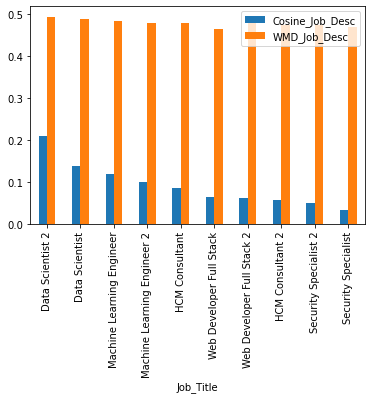

In [28]:
#Ordenamos de mayor a menor con respecto al Cosine:
new_DF_sorted_Cosine = new_DF.sort_values('Cosine_Job_Desc', ascending=False)
new_DF_sorted_Cosine
#Graficamos:
new_DF_sorted_Cosine.plot(x="Job_Title", y=["Cosine_Job_Desc", "WMD_Job_Desc"], kind="bar")

### 1.2-Gráfico de barra ordenado por WDM.

<AxesSubplot:xlabel='Job_Title'>

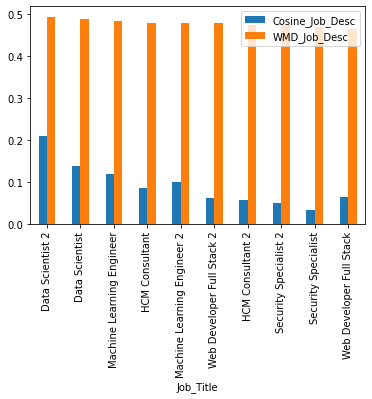

In [29]:
#Ordenamos de mayor a menor con respecto al WMD:
new_DF_sorted_WMD = new_DF.sort_values('WMD_Job_Desc', ascending=False)
new_DF_sorted_WMD
#Graficamos:
new_DF_sorted_WMD.plot(x="Job_Title", y=["Cosine_Job_Desc", "WMD_Job_Desc"], kind="bar")

#### Conclusión: 
A priori, sin realizar ningún análisis considerariamos que Karla Lewis al tener un perfil de Data Scientist, debería tener mayor similitud con los Puestos de Data Scientist y Machine Learning Engineer. 
Luego de aplicar los métodos y graficarlos observamos que esto es así: observamos en los bar chart que para ambos métodos la similitud es simil: los 2 puestos más similares son los puestos de Data Scientist 2 y Data Scientist (top 1 y 2 para ambos métodos). Luego el puesto de Machine Learning Engineer tambien es top 3 en ambos bar charts; y hay una leve diferencia en Machine Learning Engineer 2 (el cual es top 4 en el primer bar chart y top 5 en el segundo bar chart). Pero, a grandes rasgos y por lo pronto, usar Cosine o WDM como métodos de medir la similitud entre textos, dan resultados similares y esperables. 

### 2-Gráficos de barras tomando como ejemplo a Federico Calonge (HCM Consultant)

In [32]:
#Filtramos solo al Candidato Federico Calonge:
is_Federico_Calonge =  DF_J_and_C['Candidate_Name']=='HCM_Federico_Calonge'
new_DF= DF_J_and_C[is_Federico_Calonge]
new_DF

,Candidate_Name,Job_Title,Cosine_Job_Desc,WMD_Job_Desc
20,HCM_Federico_Calonge,Data Scientist,0.161,0.491
21,HCM_Federico_Calonge,Data Scientist 2,0.180,0.492
22,HCM_Federico_Calonge,HCM Consultant,0.370,0.495
23,HCM_Federico_Calonge,HCM Consultant 2,0.447,0.518
24,HCM_Federico_Calonge,Machine Learning Engineer,0.207,0.502
25,HCM_Federico_Calonge,Machine Learning Engineer 2,0.133,0.488
26,HCM_Federico_Calonge,Security Specialist,0.138,0.486
27,HCM_Federico_Calonge,Security Specialist 2,0.076,0.479
28,HCM_Federico_Calonge,Web Developer Full Stack,0.075,0.471
29,HCM_Federico_Calonge,Web Developer Full Stack 2,0.111,0.490


### 2.1-Gráfico de barra ordenado por Cosine.

<AxesSubplot:xlabel='Job_Title'>

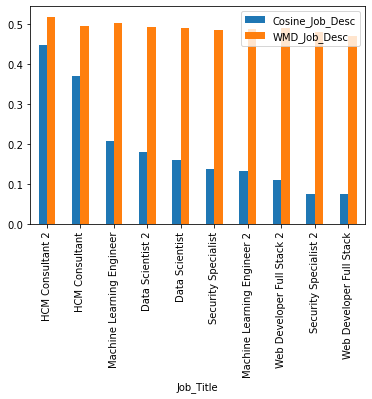

In [37]:
#Ordenamos de mayor a menor con respecto al Cosine:
new_DF_sorted_Cosine = new_DF.sort_values('Cosine_Job_Desc', ascending=False)
new_DF_sorted_Cosine
#Graficamos:
new_DF_sorted_Cosine.plot(x="Job_Title", y=["Cosine_Job_Desc", "WMD_Job_Desc"], kind="bar")

### 2.2-Gráfico de barra ordenado por WDM.

<AxesSubplot:xlabel='Job_Title'>

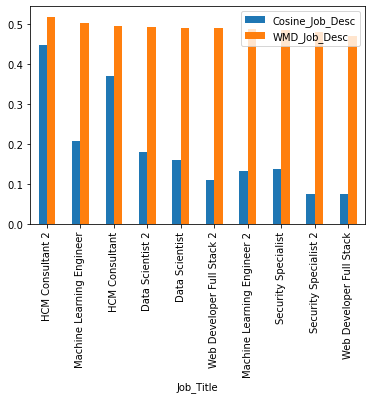

In [38]:
#Ordenamos de mayor a menor con respecto al WMD:
new_DF_sorted_WMD = new_DF.sort_values('WMD_Job_Desc', ascending=False)
new_DF_sorted_WMD
#Graficamos:
new_DF_sorted_WMD.plot(x="Job_Title", y=["Cosine_Job_Desc", "WMD_Job_Desc"], kind="bar")

#### Conclusión: 
A priori, sin realizar ningún análisis considerariamos que Federico Calonge al tener un perfil de HCM Consultant, debería tener mayor similitud con los Puestos de HCM Consultant. 
Luego de aplicar los métodos y graficarlos observamos que esto es así: observamos en los bar chart que para ambos métodos la similitud es simil: para ambos métodos HCM Consultant y HCM Consultant 2 están en el TOP 3 de similitud (HCM Consultant 2 está en la primer ubicación para ambos métodos y HCM Consultant está en segundo lugar para Cosine y en tercer lugar utilizando WMD, existiendo una leve diferencia). Pero, nuevamente a grandes rasgos, usar Cosine o WDM como métodos de medir la similitud entre textos, dan resultados similares y esperables. 

### 3-Gráficos de barras tomando como ejemplo a Bradly Johnston (ML Engineer)

In [46]:
#Filtramos solo al Candidato Bradly Johnston:
is_Bradly_Johnston =  DF_J_and_C['Candidate_Name']=='ML_Engineer_Bradly_Johnston'
new_DF= DF_J_and_C[is_Bradly_Johnston]
new_DF

,Candidate_Name,Job_Title,Cosine_Job_Desc,WMD_Job_Desc
40,ML_Engineer_Bradly_Johnston,Data Scientist,0.408,0.546
41,ML_Engineer_Bradly_Johnston,Data Scientist 2,0.501,0.551
42,ML_Engineer_Bradly_Johnston,HCM Consultant,0.171,0.505
43,ML_Engineer_Bradly_Johnston,HCM Consultant 2,0.178,0.501
44,ML_Engineer_Bradly_Johnston,Machine Learning Engineer,0.478,0.556
45,ML_Engineer_Bradly_Johnston,Machine Learning Engineer 2,0.527,0.553
46,ML_Engineer_Bradly_Johnston,Security Specialist,0.175,0.510
47,ML_Engineer_Bradly_Johnston,Security Specialist 2,0.144,0.490
48,ML_Engineer_Bradly_Johnston,Web Developer Full Stack,0.226,0.497
49,ML_Engineer_Bradly_Johnston,Web Developer Full Stack 2,0.143,0.504


### 3.1-Gráfico de barra ordenado por Cosine.

<AxesSubplot:xlabel='Job_Title'>

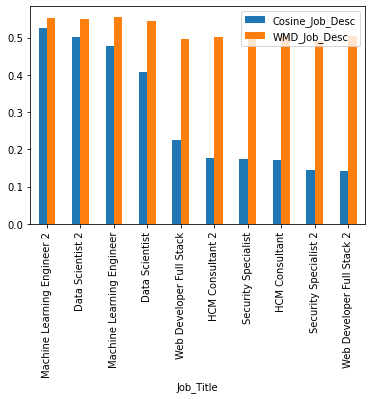

In [47]:
#Ordenamos de mayor a menor con respecto al Cosine:
new_DF_sorted_Cosine = new_DF.sort_values('Cosine_Job_Desc', ascending=False)
new_DF_sorted_Cosine
#Graficamos:
new_DF_sorted_Cosine.plot(x="Job_Title", y=["Cosine_Job_Desc", "WMD_Job_Desc"], kind="bar")

### 3.2-Gráfico de barra ordenado por WDM.

<AxesSubplot:xlabel='Job_Title'>

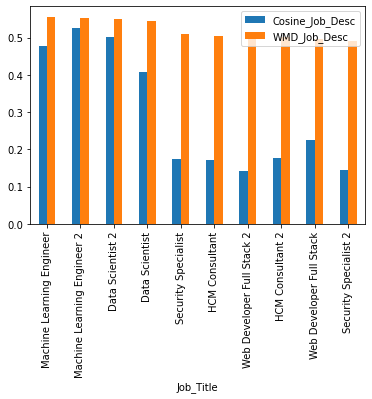

In [48]:
#Ordenamos de mayor a menor con respecto al WMD:
new_DF_sorted_WMD = new_DF.sort_values('WMD_Job_Desc', ascending=False)
new_DF_sorted_WMD
#Graficamos:
new_DF_sorted_WMD.plot(x="Job_Title", y=["Cosine_Job_Desc", "WMD_Job_Desc"], kind="bar")

#### Conclusión:

Al igual que los anteriores se obtuvieron los resultados esperados y similares entre los distintos métodos de comparación (obtiendo las mejores similitudes para los puestos de Machine Learning Engineer y Data Scientist por tener Bradly Johnston un perfil de ML Engineer).

### 4-Gráficos de barras tomando como ejemplo a Denis Banik (Security Specialist)

In [74]:
#Filtramos solo al Candidato Ahmed Wayne:
is_Denis_Banik =  DF_J_and_C['Candidate_Name']=='Security_Specialist_Denis Banik'
new_DF= DF_J_and_C[is_Denis_Banik]
new_DF

,Candidate_Name,Job_Title,Cosine_Job_Desc,WMD_Job_Desc
70,Security_Specialist_Denis Banik,Data Scientist,0.088,0.491
71,Security_Specialist_Denis Banik,Data Scientist 2,0.103,0.490
72,Security_Specialist_Denis Banik,HCM Consultant,0.108,0.490
73,Security_Specialist_Denis Banik,HCM Consultant 2,0.127,0.493
74,Security_Specialist_Denis Banik,Machine Learning Engineer,0.169,0.500
75,Security_Specialist_Denis Banik,Machine Learning Engineer 2,0.131,0.494
76,Security_Specialist_Denis Banik,Security Specialist,0.345,0.507
77,Security_Specialist_Denis Banik,Security Specialist 2,0.349,0.504
78,Security_Specialist_Denis Banik,Web Developer Full Stack,0.128,0.486
79,Security_Specialist_Denis Banik,Web Developer Full Stack 2,0.094,0.489


### 4.1-Gráfico de barra ordenado por Cosine.

<AxesSubplot:xlabel='Job_Title'>

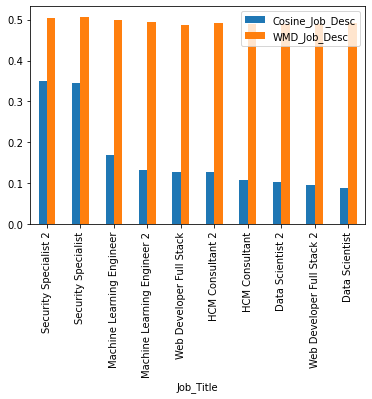

In [75]:
#Ordenamos de mayor a menor con respecto al Cosine:
new_DF_sorted_Cosine = new_DF.sort_values('Cosine_Job_Desc', ascending=False)
new_DF_sorted_Cosine
#Graficamos:
new_DF_sorted_Cosine.plot(x="Job_Title", y=["Cosine_Job_Desc", "WMD_Job_Desc"], kind="bar")

### 4.2-Gráfico de barra ordenado por WDM.

<AxesSubplot:xlabel='Job_Title'>

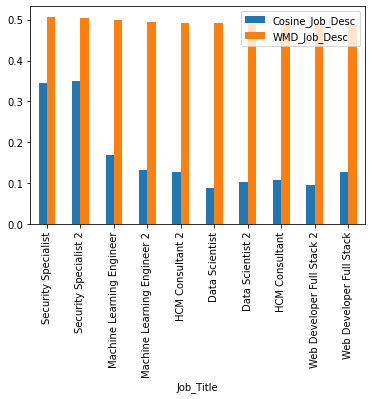

In [76]:
#Ordenamos de mayor a menor con respecto al WMD:
new_DF_sorted_WMD = new_DF.sort_values('WMD_Job_Desc', ascending=False)
new_DF_sorted_WMD
#Graficamos:
new_DF_sorted_WMD.plot(x="Job_Title", y=["Cosine_Job_Desc", "WMD_Job_Desc"], kind="bar")

#### Conclusión:

Al igual que los anteriores se obtuvieron los resultados esperados y similares entre los distintos métodos de comparación (obtiendo las mejores similitudes para los puestos de Security Specialist por tener Denis Banik dicho  perfil).

En los casos de los curriculums de Web Developer, a diferencia de los anteriores, observamos que, a priori, no se dá la lógica de que el perfil del CV tiene mayor similitud con la descripción del puesto del mismo perfil. Por ejemplo vamos a ver esto en el caso de Alec_Dionisio (perfil Web Developer).

### 5-Gráficos de barras tomando como ejemplo a Alec Dionisio (Web Developer)

In [58]:
#Filtramos solo al Candidato Alec Dionisio:
is_Alec_Dionisio =  DF_J_and_C['Candidate_Name']=='Web_Dev_Alec_Dionisio'
new_DF= DF_J_and_C[is_Alec_Dionisio]
new_DF

,Candidate_Name,Job_Title,Cosine_Job_Desc,WMD_Job_Desc
80,Web_Dev_Alec_Dionisio,Data Scientist,0.090,0.485
81,Web_Dev_Alec_Dionisio,Data Scientist 2,0.062,0.492
82,Web_Dev_Alec_Dionisio,HCM Consultant,0.075,0.485
83,Web_Dev_Alec_Dionisio,HCM Consultant 2,0.105,0.487
84,Web_Dev_Alec_Dionisio,Machine Learning Engineer,0.123,0.495
85,Web_Dev_Alec_Dionisio,Machine Learning Engineer 2,0.150,0.491
86,Web_Dev_Alec_Dionisio,Security Specialist,0.125,0.494
87,Web_Dev_Alec_Dionisio,Security Specialist 2,0.071,0.479
88,Web_Dev_Alec_Dionisio,Web Developer Full Stack,0.196,0.490
89,Web_Dev_Alec_Dionisio,Web Developer Full Stack 2,0.141,0.502


### 5.1-Gráfico de barra ordenado por Cosine.

<AxesSubplot:xlabel='Job_Title'>

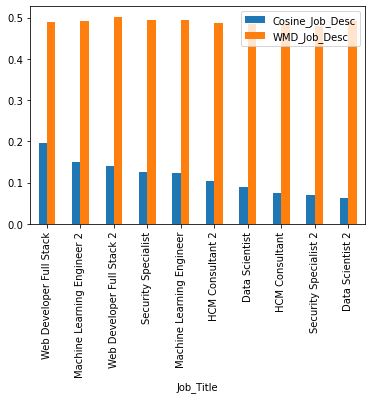

In [59]:
#Ordenamos de mayor a menor con respecto al Cosine:
new_DF_sorted_Cosine = new_DF.sort_values('Cosine_Job_Desc', ascending=False)
new_DF_sorted_Cosine
#Graficamos:
new_DF_sorted_Cosine.plot(x="Job_Title", y=["Cosine_Job_Desc", "WMD_Job_Desc"], kind="bar")

### 5.2-Gráfico de barra ordenado por WDM.

<AxesSubplot:xlabel='Job_Title'>

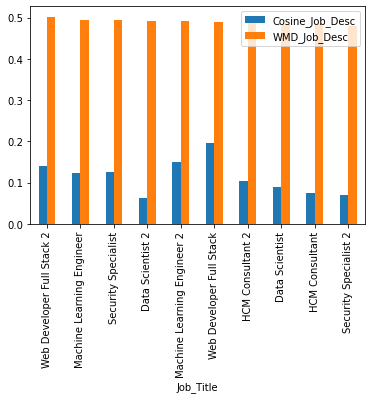

In [60]:
#Ordenamos de mayor a menor con respecto al WMD:
new_DF_sorted_WMD = new_DF.sort_values('WMD_Job_Desc', ascending=False)
new_DF_sorted_WMD
#Graficamos:
new_DF_sorted_WMD.plot(x="Job_Title", y=["Cosine_Job_Desc", "WMD_Job_Desc"], kind="bar")

#### Conclusión:
    
En este caso para Cosine nos dió lo esperado: las posiciones de Web Developer se ubican en la primera y tercera ubicación del ranking.

Sin embargo, a primera vista vemos que para WDM el puesto 'Web Developer Full Stack' se ubica en la 6ta posición, no siendo lo esperado.
Cabe destacar, que al analizar en detalle el puesto 'Web Developer Full Stack' observamos que, a comparación de 'Web Developer Full Stack 2', la descripción es mucho más acotada y no abarca tantos aspectos del puesto de Web Developer como esta última. Es por esto que, aunque nos dió un buen Score de similitud para dicho puesto (0.490), queda por detrás de la posición 'Web Developer Full Stack 2' y las demás posiciones, donde el algoritmo WDM encontró mayores similitudes. Por esto, a gran escala, los resultados para WDM tambien terminan siendo los esperables.

--------------------------------------------------------------------------------------------------------------------

Ahora realizaremos un Ranking para cada uno de los distintos puestos. Para verificar si los resultados son los esperados: si los perfiles que más se asemejan a la job descriptión de la posición comparada, estan en los primeros puestos.

### 6-Gráficos de barras tomando como ejemplo el puesto Data Scientist 2.

In [85]:
#Filtramos el puesto Data Scientist 2:
is_Data_Scientist =  DF_J_and_C['Job_Title']=='Data Scientist 2'
new_DF = DF_J_and_C[is_Data_Scientist]
new_DF

,Candidate_Name,Job_Title,Cosine_Job_Desc,WMD_Job_Desc
1,Data_Scientist_Karla_Lewis,Data Scientist 2,0.210,0.494
11,Data_Scientist_Rahul_Malik,Data Scientist 2,0.209,0.495
21,HCM_Federico_Calonge,Data Scientist 2,0.180,0.492
31,HCM_Robert_Smith,Data Scientist 2,0.083,0.486
41,ML_Engineer_Bradly_Johnston,Data Scientist 2,0.501,0.551
51,ML_Engineer_Jonathon_Price,Data Scientist 2,0.513,0.551
61,Security_Specialist_Ahmed Wayne,Data Scientist 2,0.141,0.495
71,Security_Specialist_Denis Banik,Data Scientist 2,0.103,0.490
81,Web_Dev_Alec_Dionisio,Data Scientist 2,0.062,0.492
91,Web_Dev_Karen_Higgins,Data Scientist 2,0.126,0.504


### 6.1-Gráfico de barra ordenado por Cosine.

<AxesSubplot:xlabel='Candidate_Name'>

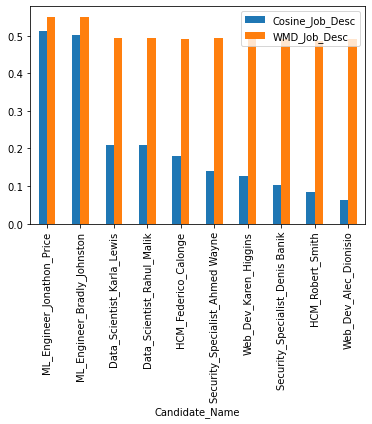

In [84]:
#Ordenamos de mayor a menor con respecto al Cosine:
new_DF_sorted_Cosine = new_DF.sort_values('Cosine_Job_Desc', ascending=False)
new_DF_sorted_Cosine
#Graficamos:
new_DF_sorted_Cosine.plot(x="Candidate_Name", y=["Cosine_Job_Desc", "WMD_Job_Desc"], kind="bar")

### 6.2-Gráfico de barra ordenado por WDM.

<AxesSubplot:xlabel='Candidate_Name'>

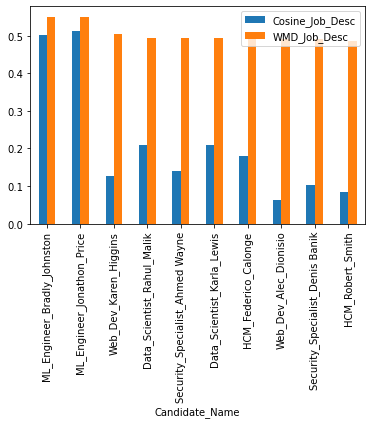

In [87]:
#Ordenamos de mayor a menor con respecto al WMD:
new_DF_sorted_WMD = new_DF.sort_values('WMD_Job_Desc', ascending=False)
new_DF_sorted_WMD
#Graficamos:
new_DF_sorted_WMD.plot(x="Candidate_Name", y=["Cosine_Job_Desc", "WMD_Job_Desc"], kind="bar")

#### Conclusión:
Observamos que para Cosine los resultados son los esperados: los perfiles de Data Science (Karla_Lewis, Rahul_Malik) y ML Engineer (Bradly Johnston y Jonathon_Price) son los que tienen mayor similitud con la posición Data Scientist 2.

Sin embargo, observamos para WDM que el perfil de Karla Lewis no obtuvo uno de los mejores resultados de similitud (terminó en el 6to puesto). No obstante, los demás perfiles de Data Science (Rahul Malik) y ML Engineer (Bradly Johnston y Jonathon_Price) si se ubican en los primeros puestos como ocurrió en Cosine, sirviendo WDM como un muy buen acercamiento inicial para evaluar cuales son, a priori, los Candidatos que más se adecuan / son más similares al puesto de Data Science.

### 7-Gráficos de barras tomando como ejemplo el puesto HCM Consultant.

In [91]:
#Filtramos el puesto HCM Consultant:
is_Data_Scientist =  DF_J_and_C['Job_Title']=='HCM Consultant'
new_DF = DF_J_and_C[is_Data_Scientist]
new_DF

,Candidate_Name,Job_Title,Cosine_Job_Desc,WMD_Job_Desc
2,Data_Scientist_Karla_Lewis,HCM Consultant,0.085,0.480
12,Data_Scientist_Rahul_Malik,HCM Consultant,0.092,0.482
22,HCM_Federico_Calonge,HCM Consultant,0.370,0.495
32,HCM_Robert_Smith,HCM Consultant,0.204,0.490
42,ML_Engineer_Bradly_Johnston,HCM Consultant,0.171,0.505
52,ML_Engineer_Jonathon_Price,HCM Consultant,0.159,0.498
62,Security_Specialist_Ahmed Wayne,HCM Consultant,0.153,0.489
72,Security_Specialist_Denis Banik,HCM Consultant,0.108,0.490
82,Web_Dev_Alec_Dionisio,HCM Consultant,0.075,0.485
92,Web_Dev_Karen_Higgins,HCM Consultant,0.141,0.493


### 7.1-Gráfico de barra ordenado por Cosine.

<AxesSubplot:xlabel='Candidate_Name'>

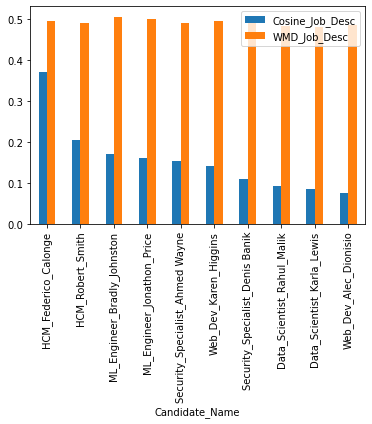

In [92]:
#Ordenamos de mayor a menor con respecto al Cosine:
new_DF_sorted_Cosine = new_DF.sort_values('Cosine_Job_Desc', ascending=False)
new_DF_sorted_Cosine
#Graficamos:
new_DF_sorted_Cosine.plot(x="Candidate_Name", y=["Cosine_Job_Desc", "WMD_Job_Desc"], kind="bar")

### 7.2-Gráfico de barra ordenado por WDM.

<AxesSubplot:xlabel='Candidate_Name'>

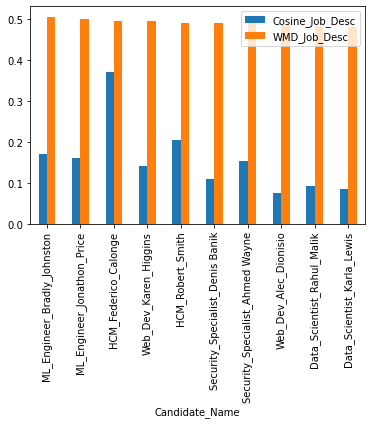

In [93]:
#Ordenamos de mayor a menor con respecto al WMD:
new_DF_sorted_WMD = new_DF.sort_values('WMD_Job_Desc', ascending=False)
new_DF_sorted_WMD
#Graficamos:
new_DF_sorted_WMD.plot(x="Candidate_Name", y=["Cosine_Job_Desc", "WMD_Job_Desc"], kind="bar")

#### Conclusión:
Al igual que el caso anterior (posición Data Scientist), observamos que para Cosine los resultados son los esperados y para WDM los resultados difieren un poco de los esperados:
* En Cosine los perfiles de HCM (Federico Calonge y Robert Smith) son los primeros  y ML Engineer (Bradly Johnston y Jonathon_Price) son los que tienen mayor similitud con la posición Data Scientist 2.
* En WDM en cambio los perfiles de HCM quedaron en 3ra y 5ta posición, y los perfiles más similes a HCM Consultant son Bradly Johnson y Jonathon Price (Ambos con perfiles de ML Engineer). 

Para este caso particular dá resultados más esperables / lógicos aplicar Cosine Sim. que WDM.

### 8-Gráficos de barras tomando como ejemplo el puesto Machine Learning Engineer.

In [94]:
#Filtramos el puesto Machine Learning Engineer:
is_Data_Scientist =  DF_J_and_C['Job_Title']=='Machine Learning Engineer'
new_DF = DF_J_and_C[is_Data_Scientist]
new_DF

,Candidate_Name,Job_Title,Cosine_Job_Desc,WMD_Job_Desc
4,Data_Scientist_Karla_Lewis,Machine Learning Engineer,0.118,0.485
14,Data_Scientist_Rahul_Malik,Machine Learning Engineer,0.146,0.492
24,HCM_Federico_Calonge,Machine Learning Engineer,0.207,0.502
34,HCM_Robert_Smith,Machine Learning Engineer,0.116,0.486
44,ML_Engineer_Bradly_Johnston,Machine Learning Engineer,0.478,0.556
54,ML_Engineer_Jonathon_Price,Machine Learning Engineer,0.475,0.552
64,Security_Specialist_Ahmed Wayne,Machine Learning Engineer,0.191,0.496
74,Security_Specialist_Denis Banik,Machine Learning Engineer,0.169,0.500
84,Web_Dev_Alec_Dionisio,Machine Learning Engineer,0.123,0.495
94,Web_Dev_Karen_Higgins,Machine Learning Engineer,0.176,0.502


### 8.1-Gráfico de barra ordenado por Cosine.

<AxesSubplot:xlabel='Candidate_Name'>

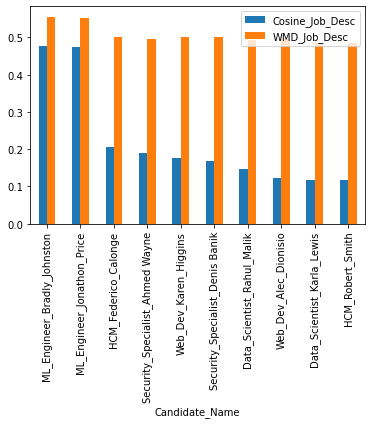

In [95]:
#Ordenamos de mayor a menor con respecto al Cosine:
new_DF_sorted_Cosine = new_DF.sort_values('Cosine_Job_Desc', ascending=False)
new_DF_sorted_Cosine
#Graficamos:
new_DF_sorted_Cosine.plot(x="Candidate_Name", y=["Cosine_Job_Desc", "WMD_Job_Desc"], kind="bar")

### 8.2-Gráfico de barra ordenado por WDM.

<AxesSubplot:xlabel='Candidate_Name'>

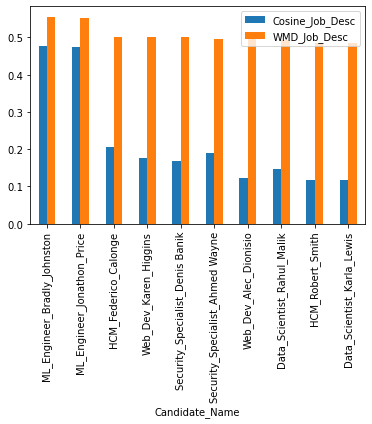

In [96]:
#Ordenamos de mayor a menor con respecto al WMD:
new_DF_sorted_WMD = new_DF.sort_values('WMD_Job_Desc', ascending=False)
new_DF_sorted_WMD
#Graficamos:
new_DF_sorted_WMD.plot(x="Candidate_Name", y=["Cosine_Job_Desc", "WMD_Job_Desc"], kind="bar")

#### Conclusión:
Vemos que para los resultados son los esperados: para el puesto de Machine Learning Engineer los perfiles de ML Engineer (Bradly Johnston y Jonathon_Price) son los que estan en los primeros puestos (tienen mejores puntajes de similitud) utilizando ambos métodos de medición de similitud (Cosine Sim. y WDM).

### 9-Gráficos de barras tomando como ejemplo el puesto Security Specialist.

In [97]:
#Filtramos el puesto Security Specialist:
is_Data_Scientist =  DF_J_and_C['Job_Title']=='Security Specialist'
new_DF = DF_J_and_C[is_Data_Scientist]
new_DF

,Candidate_Name,Job_Title,Cosine_Job_Desc,WMD_Job_Desc
6,Data_Scientist_Karla_Lewis,Security Specialist,0.033,0.470
16,Data_Scientist_Rahul_Malik,Security Specialist,0.059,0.474
26,HCM_Federico_Calonge,Security Specialist,0.138,0.486
36,HCM_Robert_Smith,Security Specialist,0.105,0.485
46,ML_Engineer_Bradly_Johnston,Security Specialist,0.175,0.510
56,ML_Engineer_Jonathon_Price,Security Specialist,0.157,0.510
66,Security_Specialist_Ahmed Wayne,Security Specialist,0.314,0.510
76,Security_Specialist_Denis Banik,Security Specialist,0.345,0.507
86,Web_Dev_Alec_Dionisio,Security Specialist,0.125,0.494
96,Web_Dev_Karen_Higgins,Security Specialist,0.154,0.501


### 9.1-Gráfico de barra ordenado por Cosine.

<AxesSubplot:xlabel='Candidate_Name'>

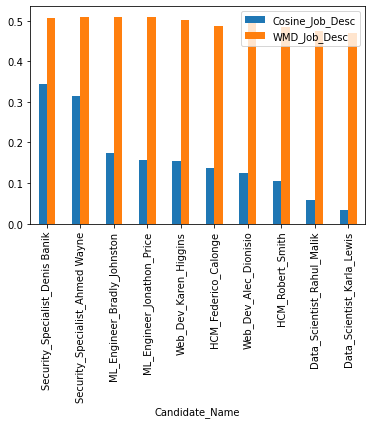

In [98]:
#Ordenamos de mayor a menor con respecto al Cosine:
new_DF_sorted_Cosine = new_DF.sort_values('Cosine_Job_Desc', ascending=False)
new_DF_sorted_Cosine
#Graficamos:
new_DF_sorted_Cosine.plot(x="Candidate_Name", y=["Cosine_Job_Desc", "WMD_Job_Desc"], kind="bar")

### 9.2-Gráfico de barra ordenado por WDM.

<AxesSubplot:xlabel='Candidate_Name'>

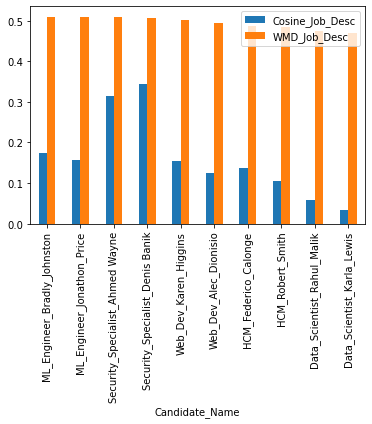

In [99]:
#Ordenamos de mayor a menor con respecto al WMD:
new_DF_sorted_WMD = new_DF.sort_values('WMD_Job_Desc', ascending=False)
new_DF_sorted_WMD
#Graficamos:
new_DF_sorted_WMD.plot(x="Candidate_Name", y=["Cosine_Job_Desc", "WMD_Job_Desc"], kind="bar")

#### Conclusión:
Al igual que ocurrió para los puestos anteriores (6: Data Scientist y 7: HCM Consultant) observamos que para Cosine los resultados son los esperados y para WDM los resultados difieren un poco de los esperados:
* En Cosine los perfiles de Security Specialist (Denis Banik y Ahmed Wayne) son los primeros ya que son los que tienen mayor similitud con la posición Security Specialist.
* En WDM en cambio los perfiles de Security Specialist quedaron en 3ra y 4ta posición, y los perfiles más similes a Security Specialist son Bradly Johnson y Jonathon Price (Ambos con perfiles de ML Engineer). 

Para este caso particular tambien dá resultados más esperables / lógicos aplicar Cosine Sim. que WDM.

### 10-Gráfico de barras tomando como ejemplo el puesto Web Developer Full Stack.

In [100]:
#Filtramos el puesto Web Developer Full Stack 2:
is_Data_Scientist =  DF_J_and_C['Job_Title']=='Web Developer Full Stack'
new_DF = DF_J_and_C[is_Data_Scientist]
new_DF

,Candidate_Name,Job_Title,Cosine_Job_Desc,WMD_Job_Desc
8,Data_Scientist_Karla_Lewis,Web Developer Full Stack,0.063,0.466
18,Data_Scientist_Rahul_Malik,Web Developer Full Stack,0.094,0.470
28,HCM_Federico_Calonge,Web Developer Full Stack,0.075,0.471
38,HCM_Robert_Smith,Web Developer Full Stack,0.128,0.473
48,ML_Engineer_Bradly_Johnston,Web Developer Full Stack,0.226,0.497
58,ML_Engineer_Jonathon_Price,Web Developer Full Stack,0.106,0.482
68,Security_Specialist_Ahmed Wayne,Web Developer Full Stack,0.081,0.471
78,Security_Specialist_Denis Banik,Web Developer Full Stack,0.128,0.486
88,Web_Dev_Alec_Dionisio,Web Developer Full Stack,0.196,0.490
98,Web_Dev_Karen_Higgins,Web Developer Full Stack,0.188,0.490


### 10.1-Gráfico de barra ordenado por Cosine.

<AxesSubplot:xlabel='Candidate_Name'>

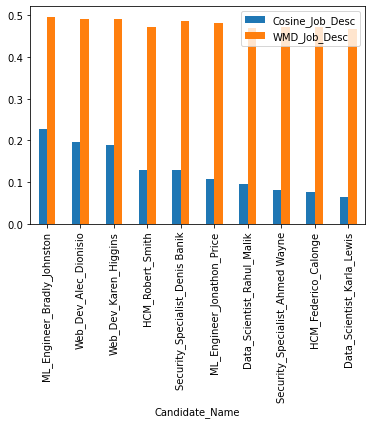

In [101]:
#Ordenamos de mayor a menor con respecto al Cosine:
new_DF_sorted_Cosine = new_DF.sort_values('Cosine_Job_Desc', ascending=False)
new_DF_sorted_Cosine
#Graficamos:
new_DF_sorted_Cosine.plot(x="Candidate_Name", y=["Cosine_Job_Desc", "WMD_Job_Desc"], kind="bar")

### 10.2-Gráfico de barra ordenado por WDM.

<AxesSubplot:xlabel='Candidate_Name'>

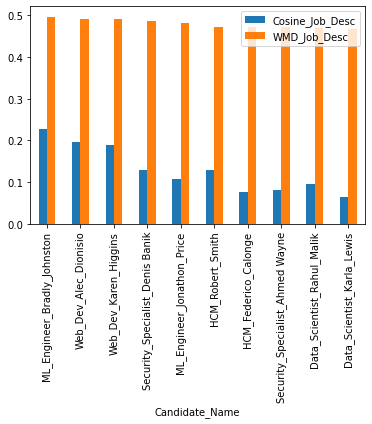

In [102]:
#Ordenamos de mayor a menor con respecto al WMD:
new_DF_sorted_WMD = new_DF.sort_values('WMD_Job_Desc', ascending=False)
new_DF_sorted_WMD
#Graficamos:
new_DF_sorted_WMD.plot(x="Candidate_Name", y=["Cosine_Job_Desc", "WMD_Job_Desc"], kind="bar")

#### Conclusión:

Para esta posición (Web Developer Full Stack) observamos que para ambos métodos de comparación los primeros 3 puestos fueron los mismos. Y, los perfiles de Web Developer (Alec Dionsio y Karen Higgins), se ubicaron en 2da y 3ra posición, siendo un resultado esperado.

### Conclusión final de los análisis:

Para algunos casos (puestos 6,7,9: Data Scientist, HCM Consultant y Security Specialist) observamos que nos dió resultados más esperables / lógicos aplicar Cosine Sim. que WDM.

Sin embargo, en general WDM tambien nos dió buenos resultados para estos puestos (6,7,9): en estos casos los perfiles que coincidian con estos puestos quedaron entre la 2da y la 5ta posición.


Por lo tanto, la utilización de los métodos Cosine Sim. y WDM sirve para darnos un buen acercamiento inicial para evaluar cuales son, a priori, los Candidatos que más se adecuan / son más similares para cada uno de los puestos.